In [30]:
import sys

sys.path.append("./megai_man")

from stable_baselines3 import PPO
import torch as th
from torchviz import make_dot
from torchsummary import summary

from megai_man.env import make_venv

In [9]:
multi_input = True
n_envs = 1
frameskip = 4
frame_stack = 4
time_punishment_factor = 0
env_kwargs = {
    "n_envs": n_envs,
    "state": "CutMan",
    "screen": None,
    "frameskip": frameskip,
    "frame_stack": frame_stack,
    "truncate_if_no_improvement": False,
    "obs_space": "screen",
    "action_space": "multi_discrete",
    "crop_img": False,
    "invincible": False,
    "no_enemies": False,
    "render_mode": None,
    "fixed_damage_punishment": 0.12,
    "forward_factor": 0.05,
    "backward_factor": 0.055,
    "time_punishment_factor": time_punishment_factor,
    "multi_input": multi_input,
    "curriculum": False,
    "screen_rewards": False,
    "distance_only_on_ground": True,
    "term_back_screen": True,
}
venv = make_venv(**env_kwargs)
obs = venv.reset()
venv.close()

In [21]:
model = (
    "checkpoints/"
    "sevs32_all_steps512_batch128_lr2.5e-04_epochs4_clip0.2_ecoef1e-03_gamma0.99_vf1_twoFEs__fs4_stack4_rews0.05+screen1_dmg0.12_groundonly_termbackscreen2_spikefix6_scen3_skipB_multinput5_cnnoutdim256_editROM3_visible"
    "_1000000_steps"
)
model = PPO.load(model)

th_obs = {}
for key in obs:
    th_obs[key] = th.from_numpy(obs[key]).cuda()

th_obs
y = model.policy(th_obs)

In [ ]:
# doesn't work with Dict input, but interesting
# https://netron.app/
# th.onnx.export(
#     model.policy,
#     th_obs,
#     "model.onnx",
#     input_names=["input"],
#     output_names=["output"],
# )

In [37]:
model.policy

CustomMultiInputPolicy(
  (features_extractor): CustomCombinedExtractor(
    (extractors): ModuleDict(
      (image): NatureCNN(
        (cnn): Sequential(
          (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
          (1): ReLU()
          (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
          (3): ReLU()
          (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
          (5): ReLU()
          (6): Flatten(start_dim=1, end_dim=-1)
        )
        (linear): Sequential(
          (0): Linear(in_features=3136, out_features=256, bias=True)
          (1): ReLU()
        )
      )
      (vector): Flatten(start_dim=1, end_dim=-1)
    )
  )
  (pi_features_extractor): CustomCombinedExtractor(
    (extractors): ModuleDict(
      (image): NatureCNN(
        (cnn): Sequential(
          (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
          (1): ReLU()
          (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
          (3): ReLU()
          (4): Conv2

In [36]:
_ = summary(model.policy)

Layer (type:depth-idx)                   Param #
├─CustomCombinedExtractor: 1-1           --
|    └─ModuleDict: 2-1                   --
|    |    └─NatureCNN: 3-1               881,056
|    |    └─Flatten: 3-2                 --
├─CustomCombinedExtractor: 1-2           --
|    └─ModuleDict: 2-2                   --
|    |    └─NatureCNN: 3-3               881,056
|    |    └─Flatten: 3-4                 --
├─MlpExtractor: 1-3                      --
|    └─Sequential: 2-3                   --
|    |    └─Linear: 3-5                  16,640
|    |    └─Tanh: 3-6                    --
|    |    └─Linear: 3-7                  4,160
|    |    └─Tanh: 3-8                    --
|    └─Sequential: 2-4                   --
|    |    └─Linear: 3-9                  16,640
|    |    └─Tanh: 3-10                   --
|    |    └─Linear: 3-11                 4,160
|    |    └─Tanh: 3-12                   --
├─Linear: 1-4                            650
├─Linear: 1-5                            65
To

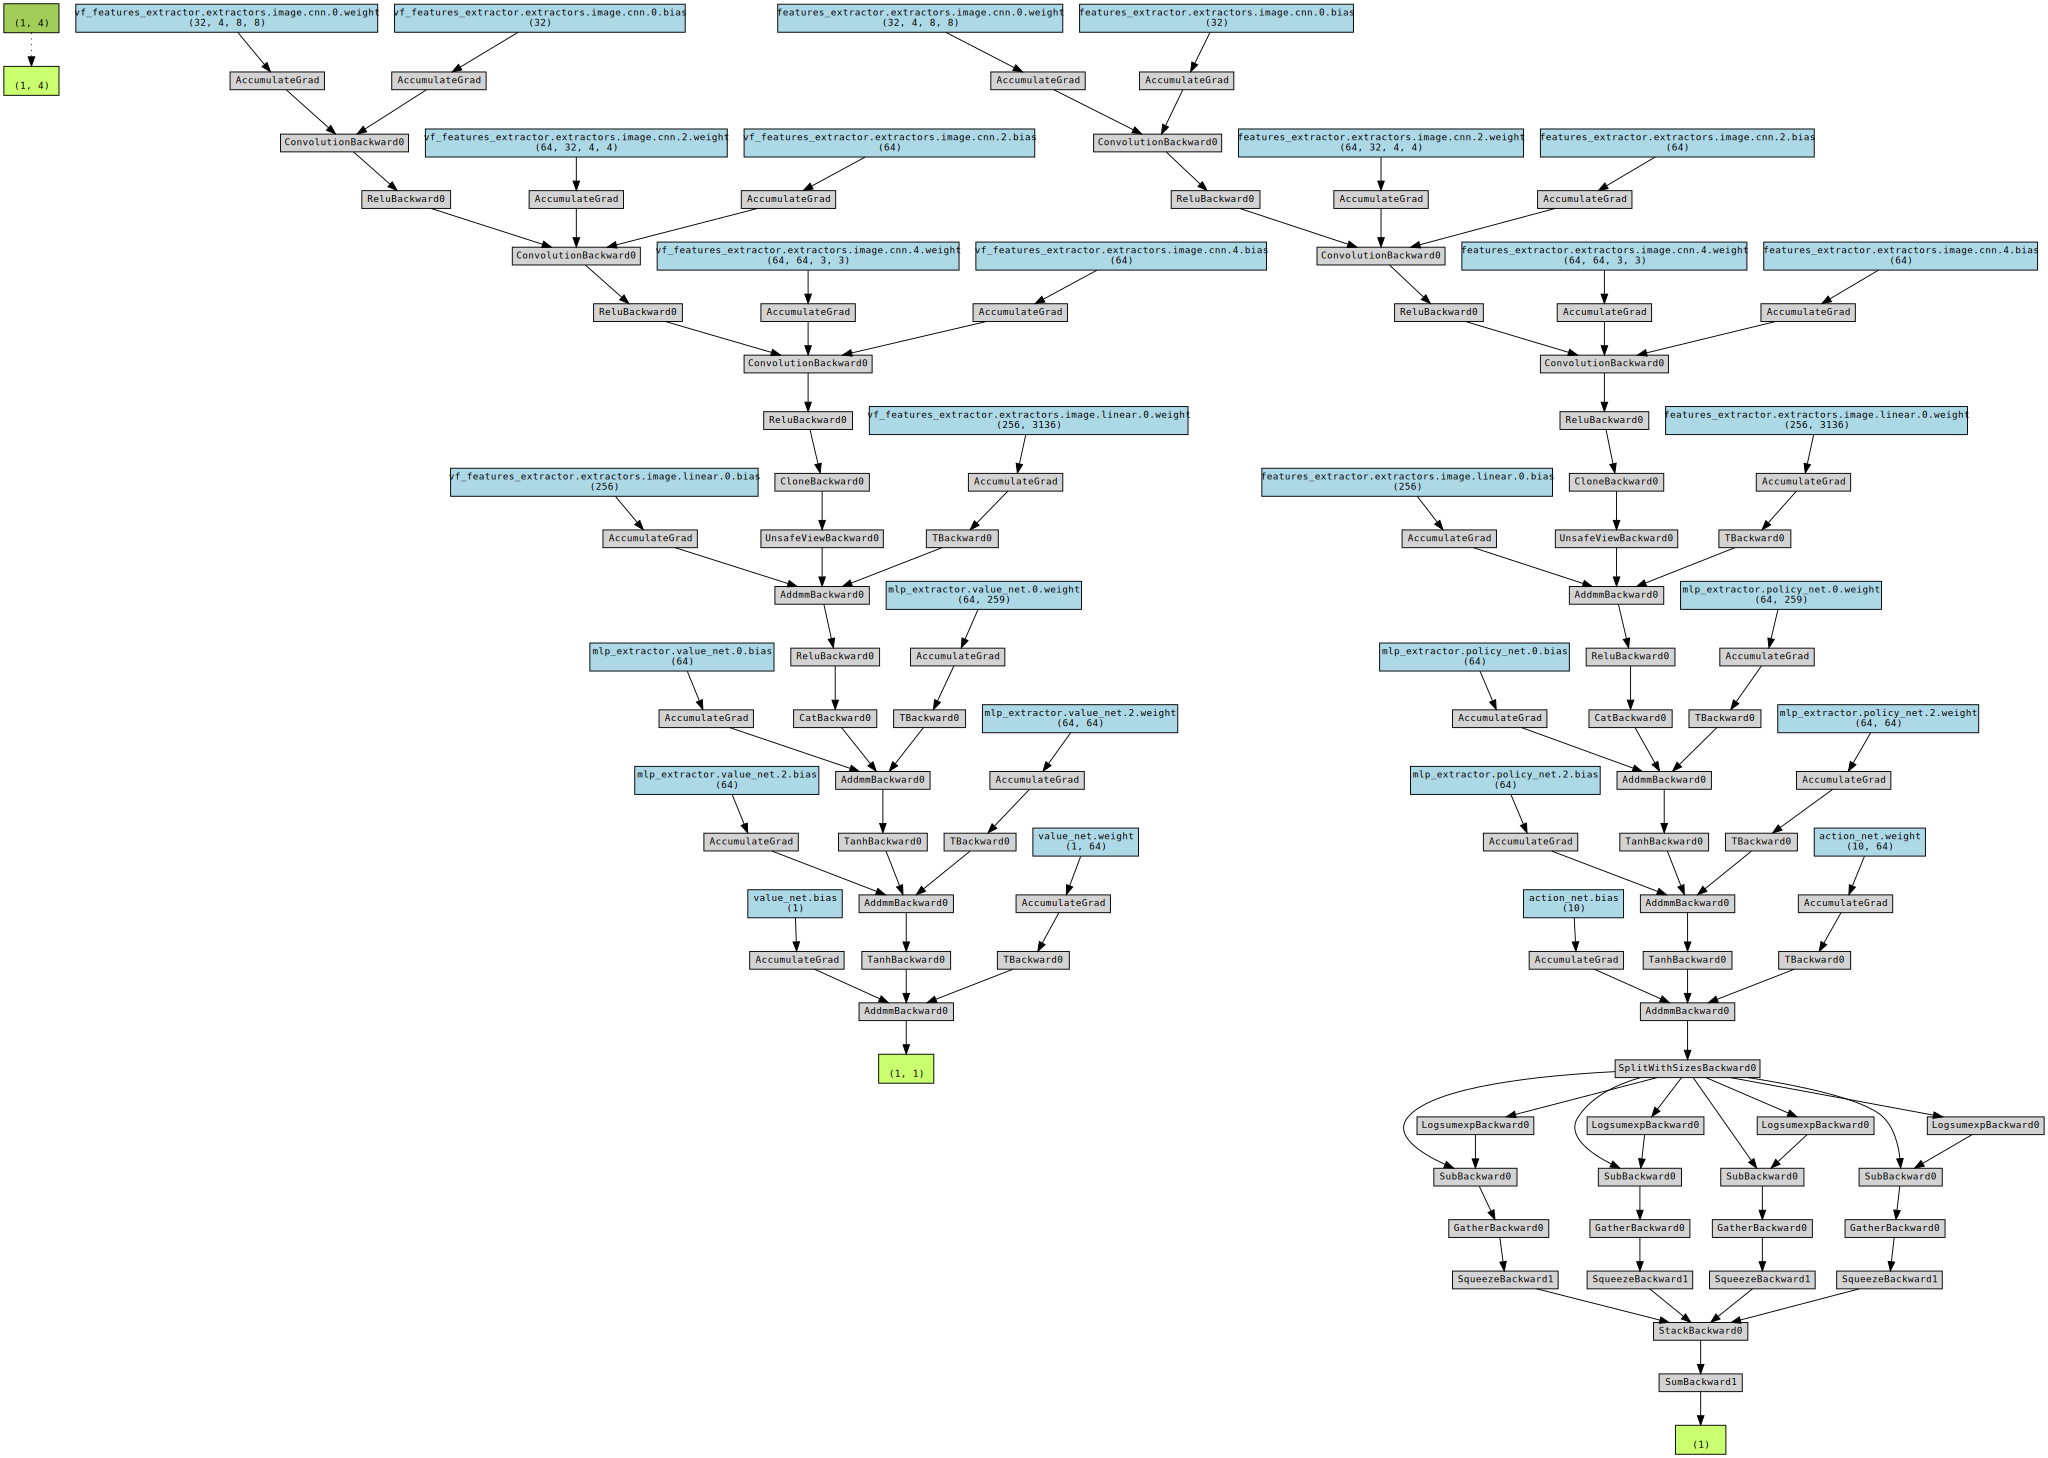

In [29]:
make_dot(y, params=dict(model.policy.named_parameters()))